running instructions:

-download prerequisite datasets listen in data importfile

-run latest data import file

-run this file

In [1]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_closing_SnP500_39_years_clean = pd.read_csv('data/df_closing_SnP500_39_years_clean.csv', parse_dates = True, index_col = 'Date')

In [3]:
df_closing_SnP500_39_years_clean

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-03,44.00,24.60,41.70,25.625,35.00,23.625,46.000,21.25,15.17,13.75,...,33.750,13.01,36.750,36.625,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-04,44.00,24.60,41.70,27.875,35.00,23.625,47.500,21.25,15.17,13.75,...,34.125,13.01,37.000,37.125,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-05,44.00,24.60,41.70,28.250,35.00,23.625,48.000,21.25,15.17,13.75,...,35.000,13.01,37.250,37.375,8.75,24.25,29.125,29.76,18.25,35.00
1984-01-06,44.00,24.60,41.70,27.750,35.00,23.625,47.875,21.25,15.17,13.75,...,34.750,13.01,37.625,37.375,8.75,24.25,29.125,29.76,18.25,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,149.23,12.71,143.28,131.860,163.10,170.010,108.180,63.38,266.09,338.45,...,31.490,80.72,70.930,108.680,31.83,109.73,128.900,126.69,248.22,48.45
2022-12-27,149.55,12.53,145.02,130.030,162.99,169.000,108.570,63.62,265.31,335.09,...,31.470,84.33,71.570,110.190,32.07,110.72,129.900,127.28,251.00,48.84
2022-12-28,148.09,12.32,145.30,126.040,162.23,167.360,107.830,62.60,263.12,328.33,...,30.630,80.09,70.570,108.380,30.98,108.94,129.310,125.99,246.84,47.97


In [4]:
df_closing_DOW_39_years_clean = pd.read_csv('data/df_closing_DOW_39_years_clean.csv', parse_dates = True, index_col = 'Date')


In [5]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [6]:
df_closing_DOW_39_years_clean

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-02,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-03,4.688,70.375,25.25,7.250,69.625,45.875,28.00,56.50,55.625,44.000,...,82.250,14.875,90.375,52.625,53.250,49.80,22.25,67.125,37.750,40.750
1984-01-04,4.688,70.375,24.50,7.125,70.875,48.750,28.00,56.50,55.125,45.875,...,84.125,15.375,90.250,53.000,54.875,49.80,22.25,69.125,37.625,41.125
1984-01-05,4.688,70.375,26.00,7.500,72.250,49.000,28.00,56.50,55.625,47.750,...,84.875,15.875,91.500,53.250,55.250,49.80,22.25,69.750,37.750,43.000
1984-01-06,4.688,70.375,25.75,8.000,72.250,48.625,28.00,56.50,54.500,47.625,...,84.625,16.375,91.125,52.750,54.625,49.80,22.25,71.000,37.875,42.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,531.310,345.510,318.73,263.920,267.570,239.870,238.73,205.83,213.870,189.060,...,120.140,116.250,111.860,88.010,63.820,50.86,47.48,38.410,38.630,26.090
2022-12-27,531.990,341.970,319.55,263.390,266.840,243.140,236.96,206.29,214.890,189.400,...,120.220,117.560,112.120,86.370,64.210,51.19,47.53,39.250,38.310,25.940
2022-12-28,528.450,340.870,315.73,261.420,265.110,239.380,234.53,204.99,212.190,188.380,...,118.290,114.980,111.080,84.170,63.570,49.99,47.07,38.810,37.580,25.540


In [7]:
df_closing_DOW_39_years_clean.columns

Index(['UNH', 'GS', 'HD', 'AMGN', 'MCD', 'CAT', 'MSFT', 'V', 'HON', 'BA',
       'TRV', 'CVX', 'JNJ', 'AXP', 'PG', 'CRM', 'IBM', 'WMT', 'JPM', 'AAPL',
       'MMM', 'NKE', 'MRK', 'DIS', 'KO', 'DOW', 'CSCO', 'VZ', 'WBA', 'INTC'],
      dtype='object')

In [8]:
returns = df_closing_DOW_39_years_clean.pct_change().dropna()
abs_returns = returns.abs()
squared_returns = returns

In [9]:
abs_returns

,UNH,GS,HD,AMGN,MCD,CAT,MSFT,V,HON,BA,...,MMM,NKE,MRK,DIS,KO,DOW,CSCO,VZ,WBA,INTC
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984-01-04,0.000000,0.000000,0.029703,0.017241,0.017953,0.062670,0.000000,0.000000,0.008989,0.042614,...,0.022796,0.033613,0.001383,0.007126,0.030516,0.000000,0.000000,0.029795,0.003311,0.009202
1984-01-05,0.000000,0.000000,0.061224,0.052632,0.019400,0.005128,0.000000,0.000000,0.009070,0.040872,...,0.008915,0.032520,0.013850,0.004717,0.006834,0.000000,0.000000,0.009042,0.003322,0.045593
1984-01-06,0.000000,0.000000,0.009615,0.066667,0.000000,0.007653,0.000000,0.000000,0.020225,0.002618,...,0.002946,0.031496,0.004098,0.009390,0.011312,0.000000,0.000000,0.017921,0.003311,0.005814
1984-01-09,0.000000,0.000000,0.000000,0.015625,0.029412,0.010283,0.000000,0.000000,0.004587,0.002625,...,0.008863,0.007634,0.010974,0.000000,0.013730,0.000000,0.000000,0.012324,0.023102,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.008006,0.000203,0.008256,0.005052,0.006773,0.009809,0.002267,0.003755,0.007348,0.004303,...,0.011925,0.003941,0.005574,0.015461,0.007578,0.013753,0.003381,0.002610,0.004943,0.004621
2022-12-27,0.001280,0.010246,0.002573,0.002008,0.002728,0.013632,0.007414,0.002235,0.004769,0.001798,...,0.000666,0.011269,0.002324,0.018634,0.006111,0.006488,0.001053,0.021869,0.008284,0.005749
2022-12-28,0.006654,0.003217,0.011954,0.007479,0.006483,0.015464,0.010255,0.006302,0.012565,0.005385,...,0.016054,0.021946,0.009276,0.025472,0.009967,0.023442,0.009678,0.011210,0.019055,0.015420


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_39092\4023233967.py:16: RuntimeWarning: invalid value encountered in log
  acf_squared_returns_log = np.log(acf_squared_returns)
C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


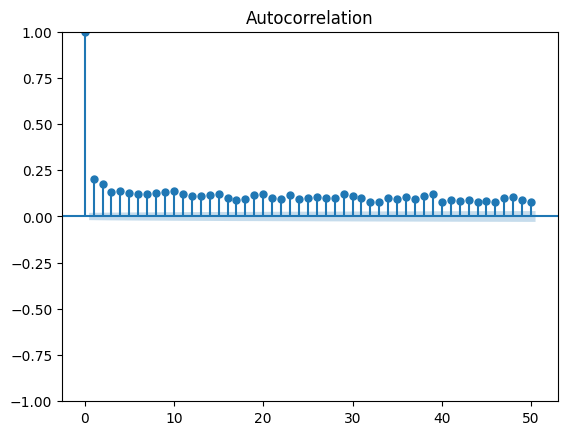

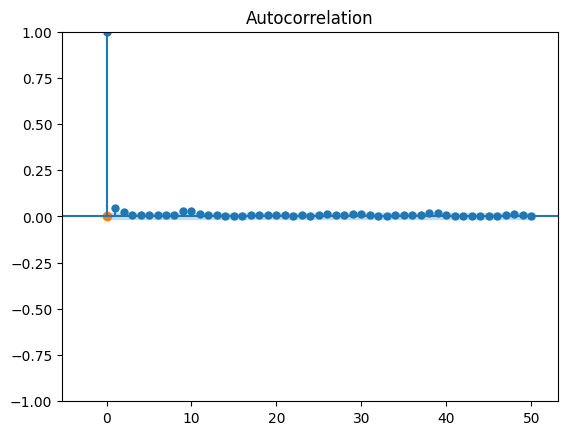

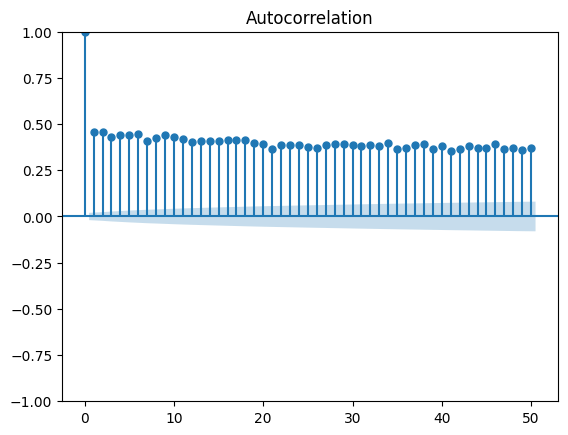

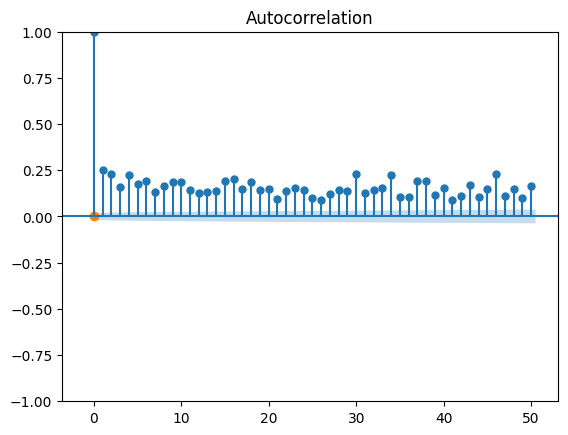

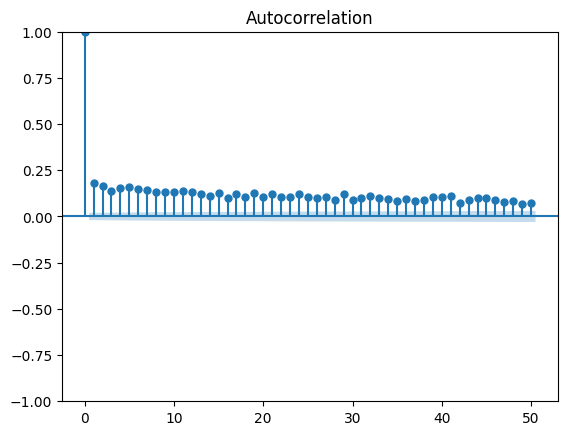

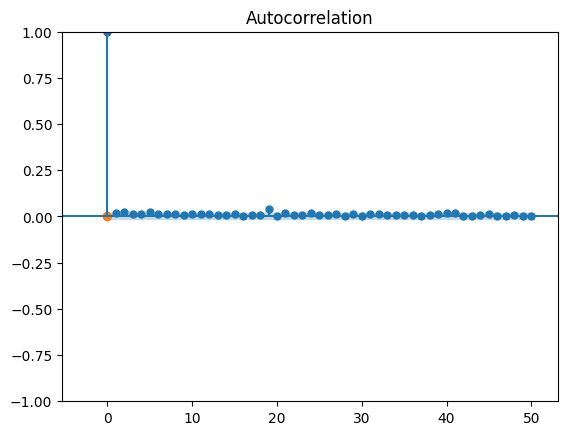

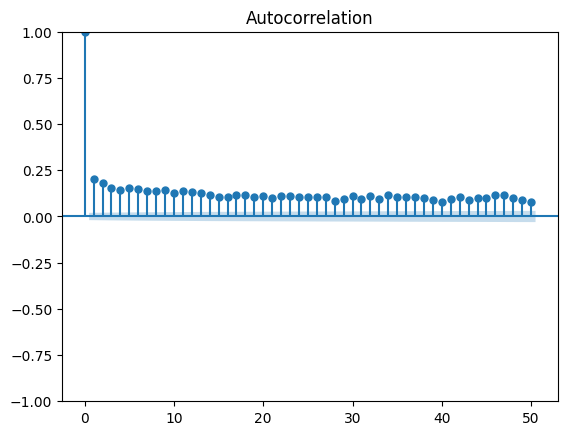

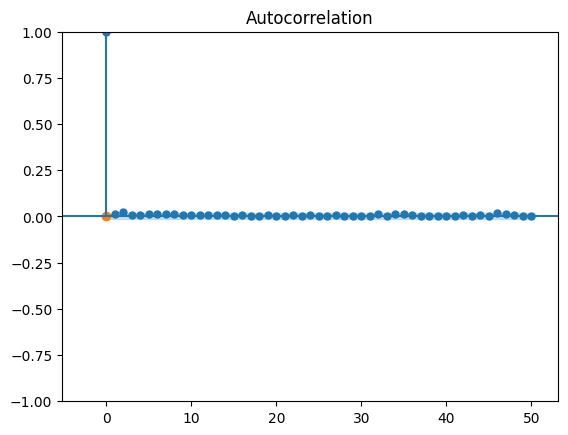

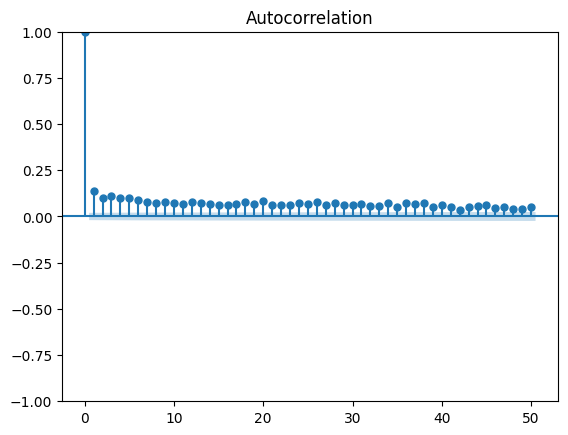

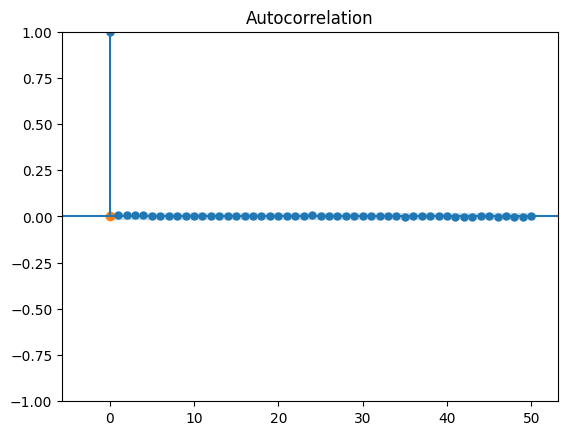

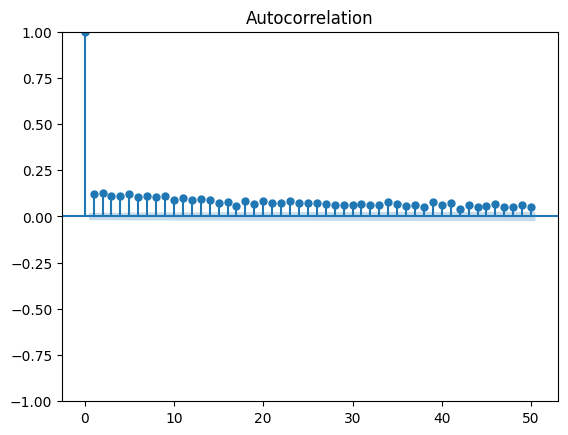

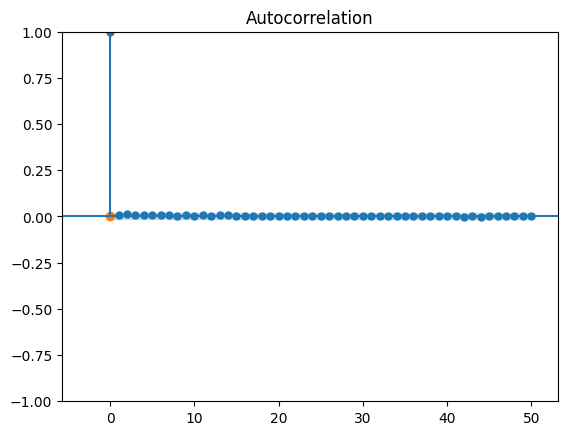

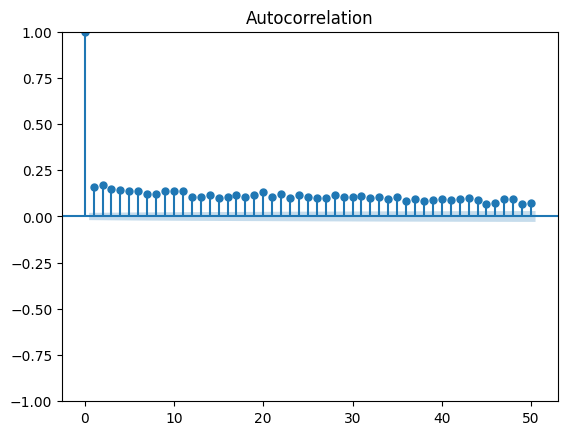

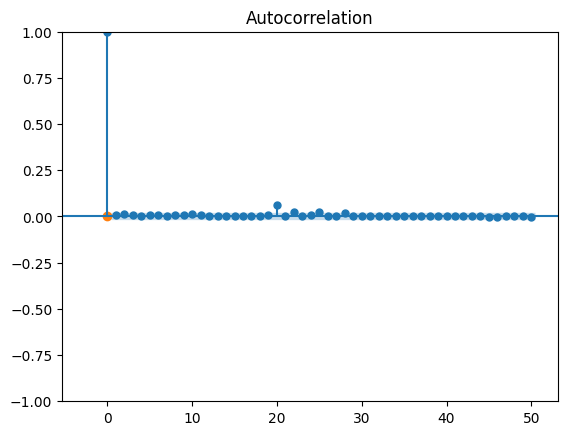

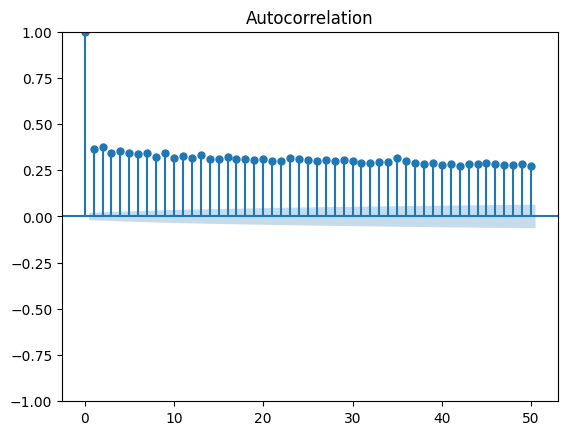

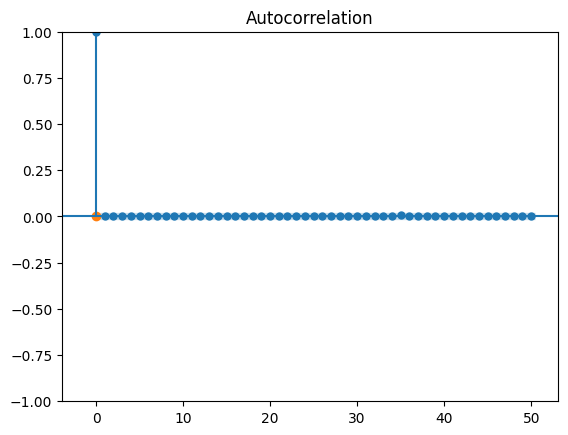

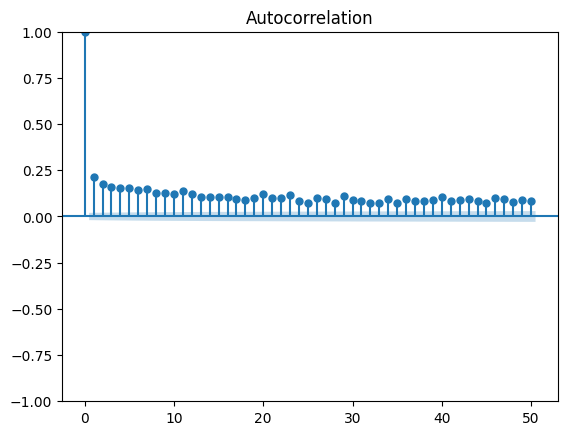

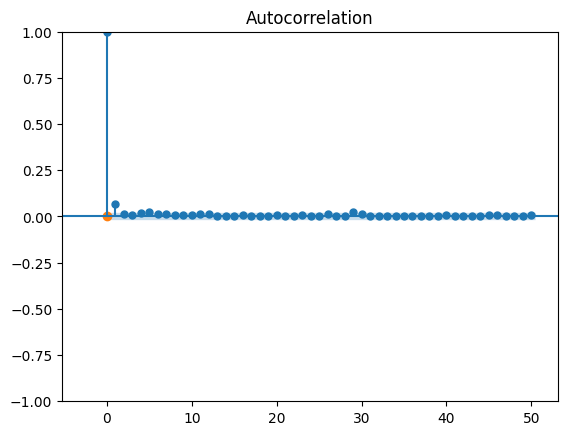

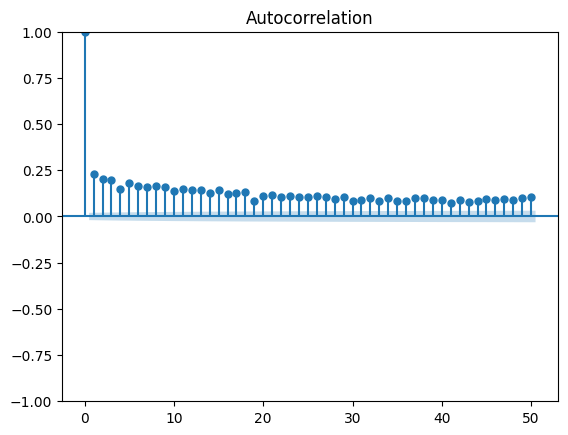

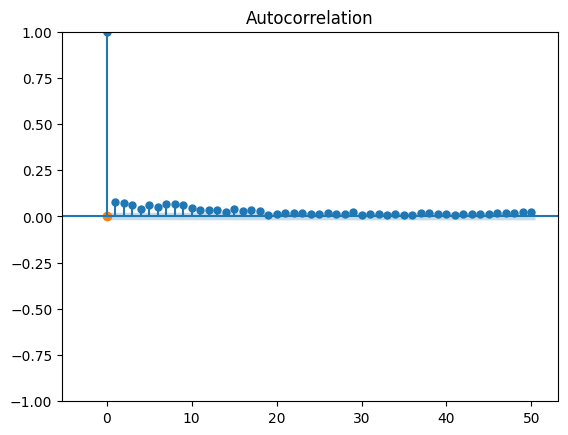

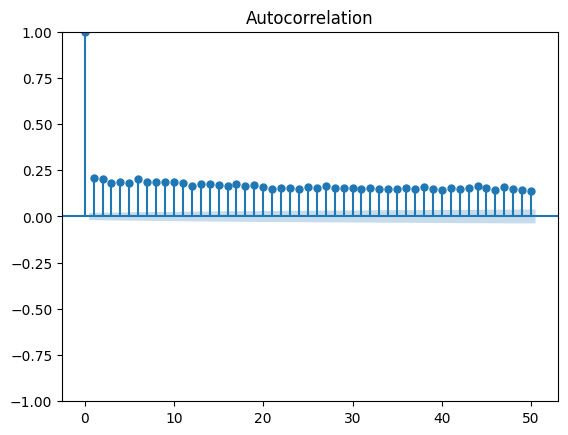

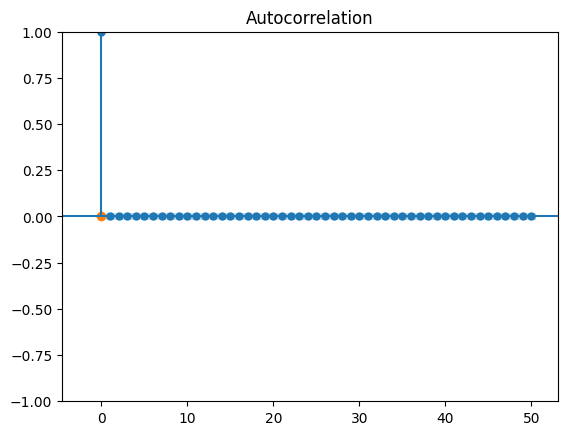

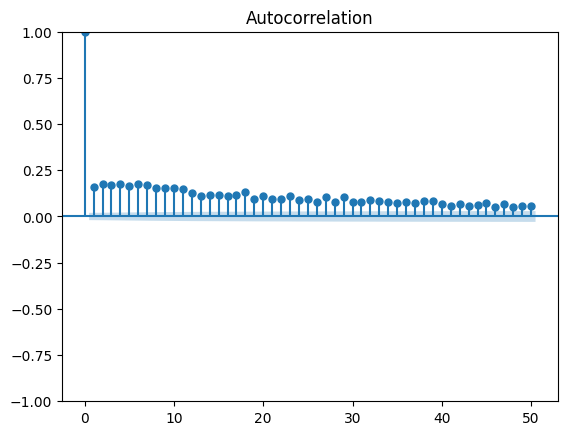

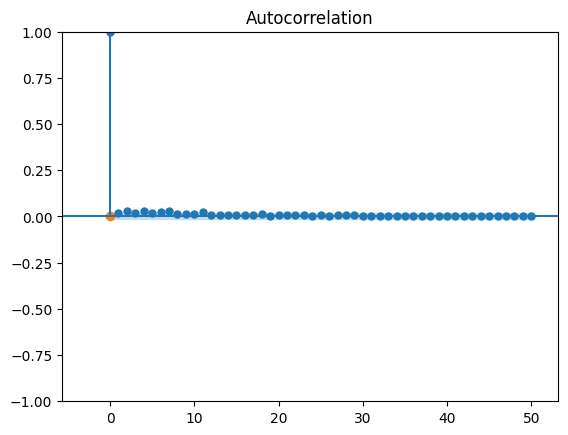

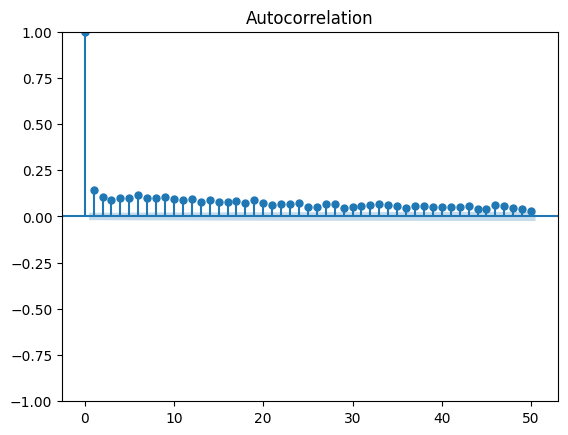

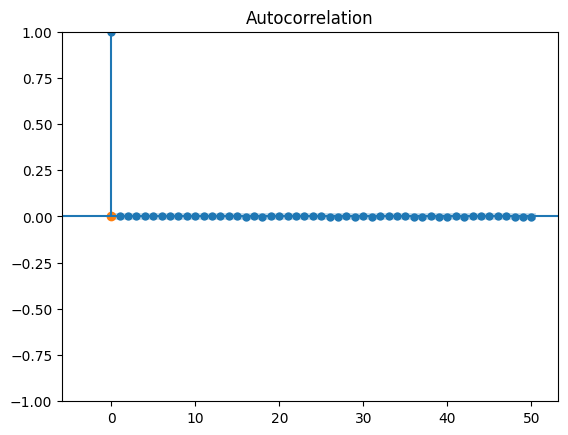

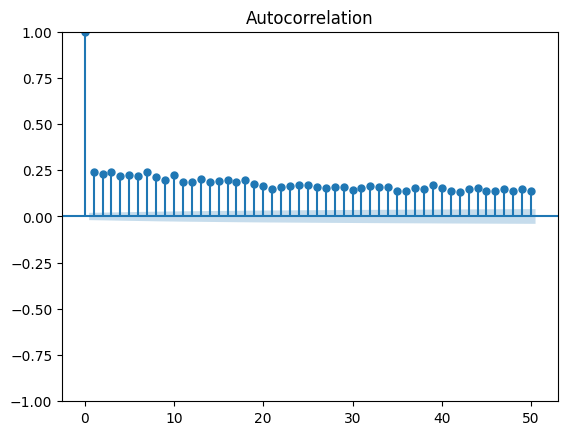

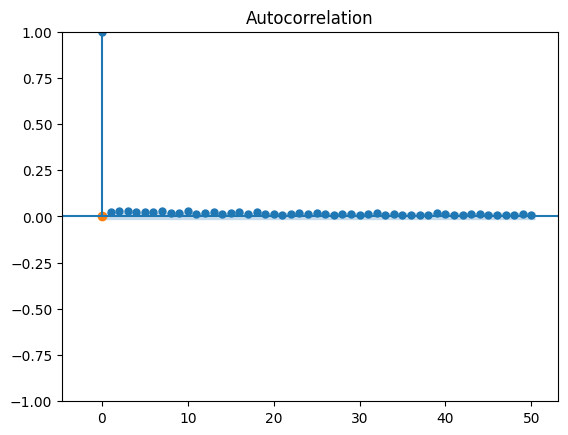

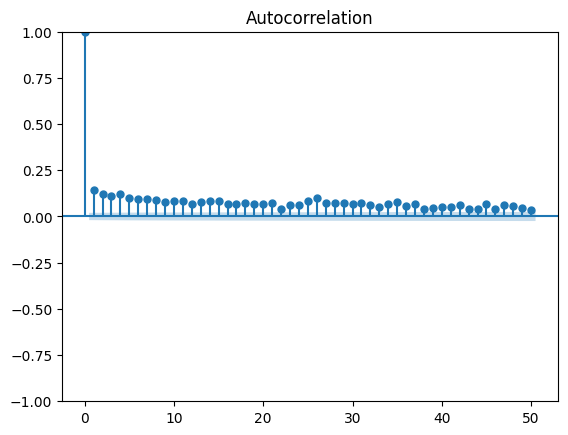

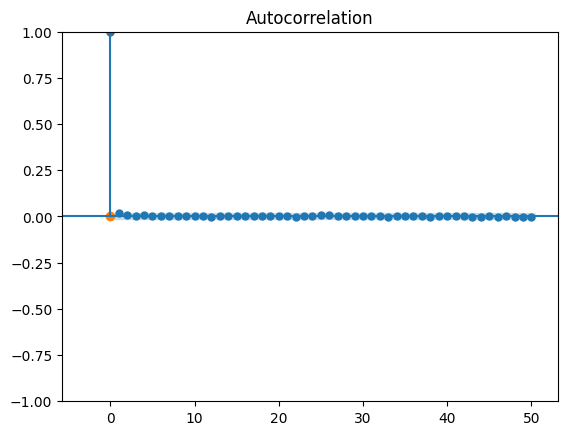

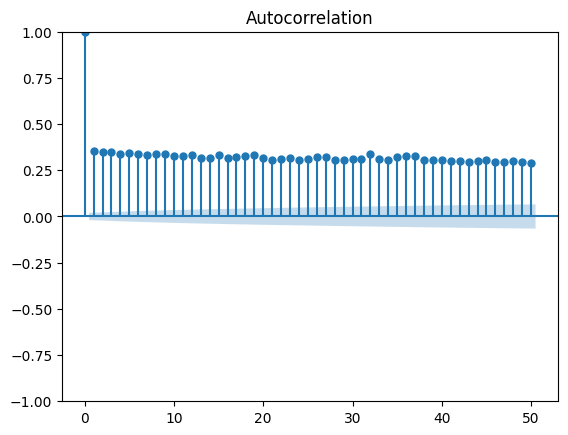

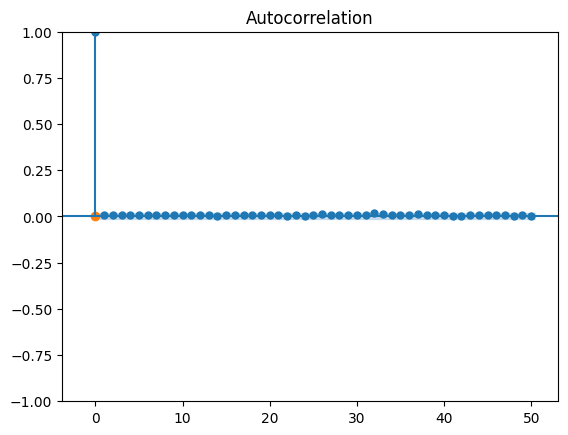

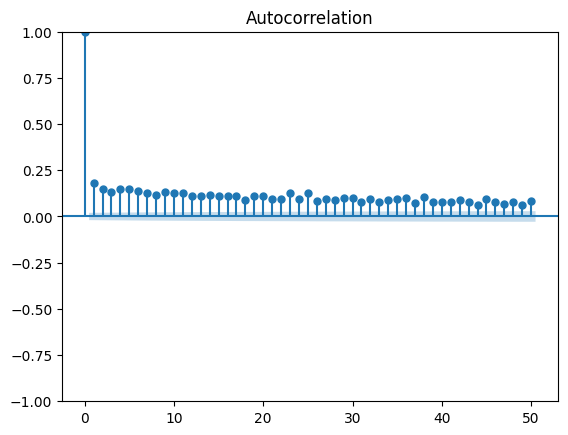

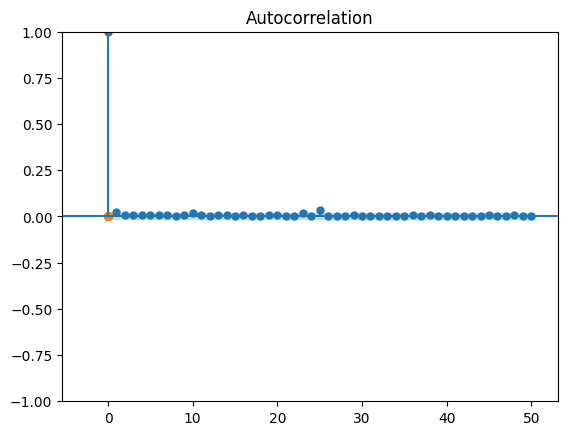

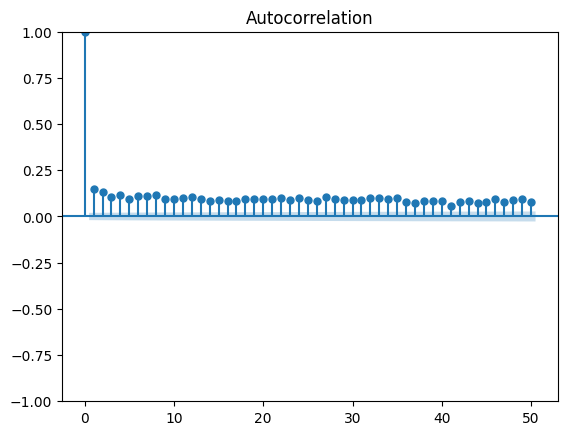

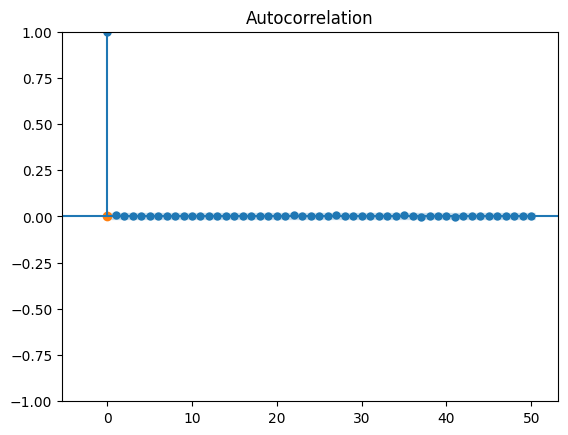

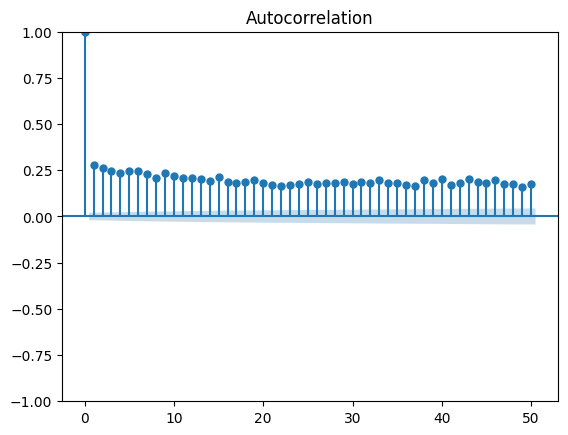

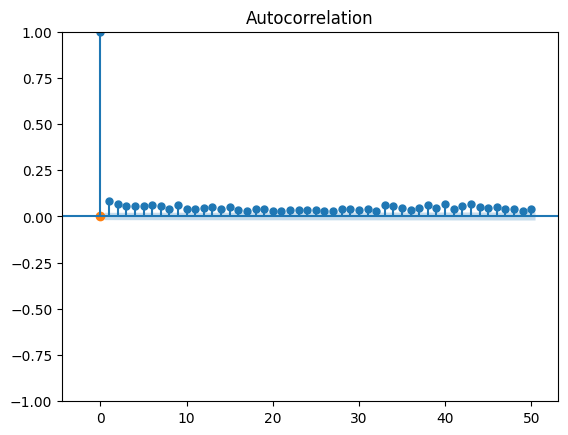

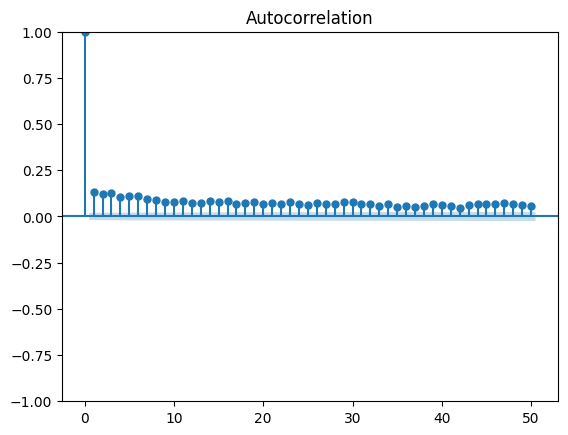

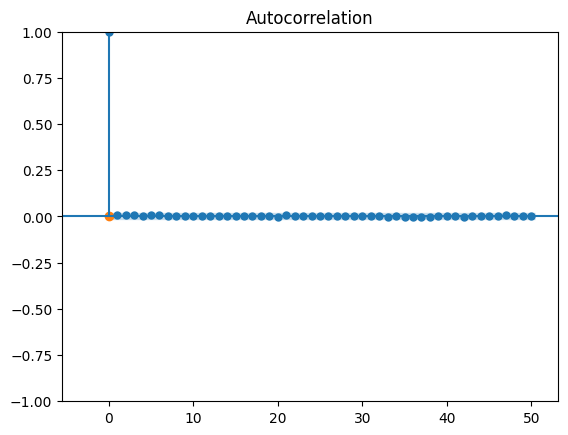

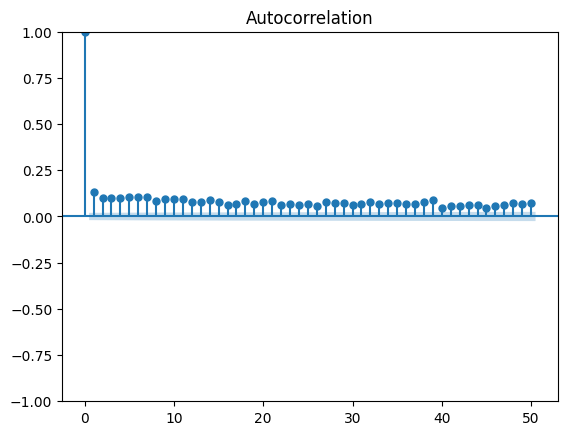

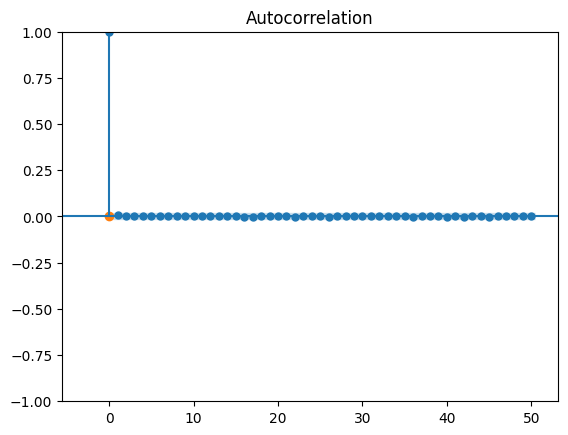

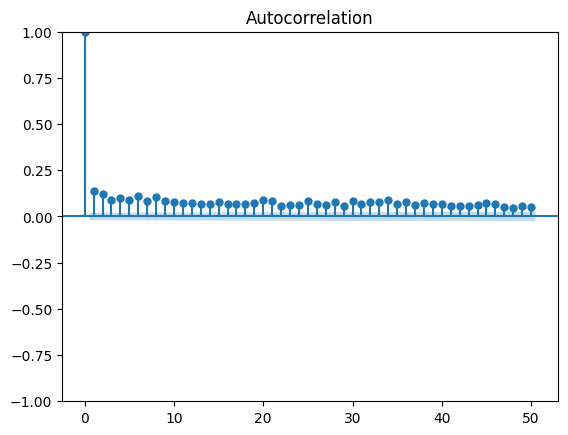

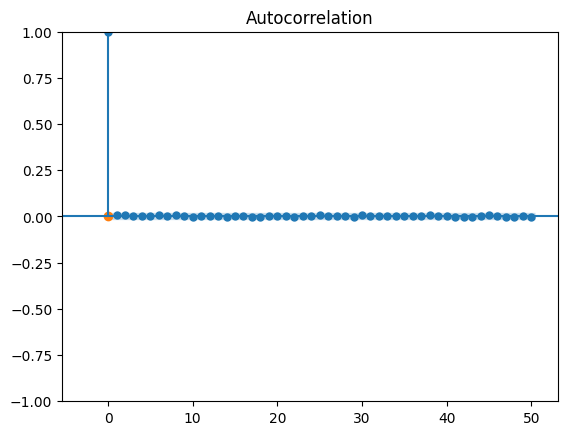

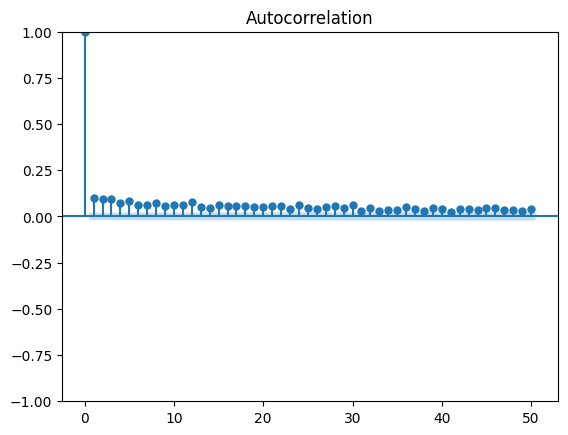

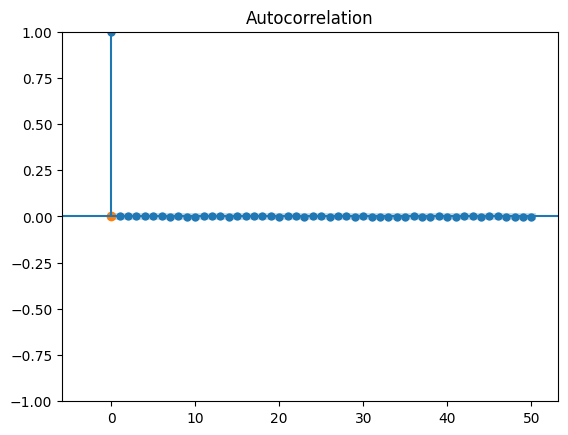

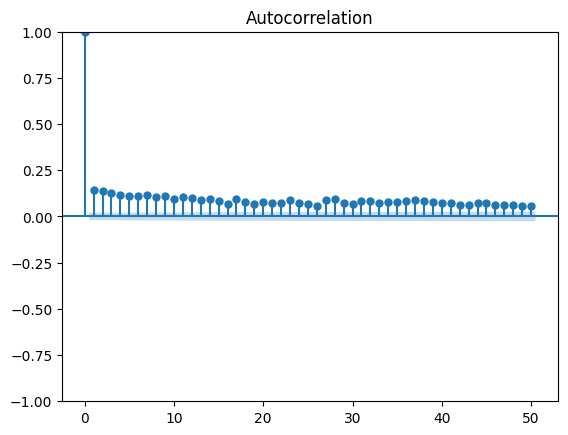

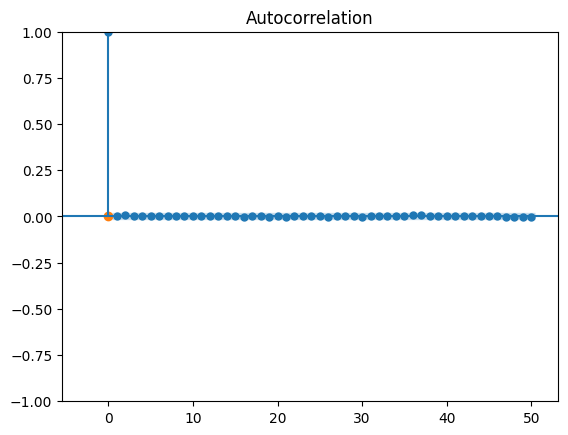

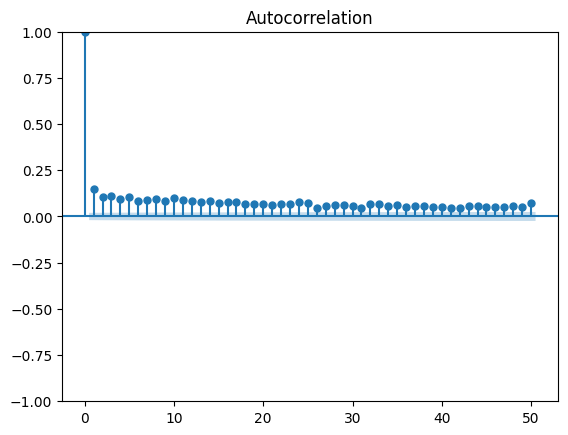

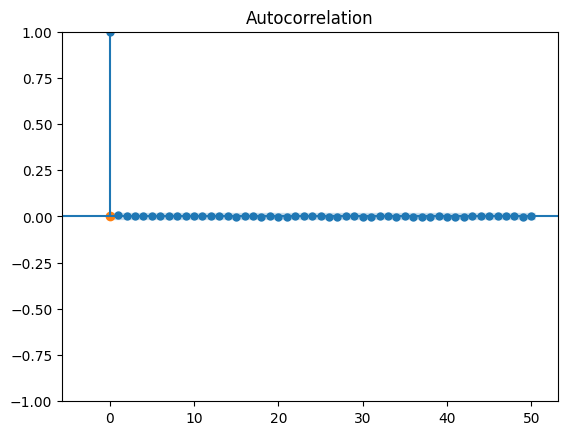

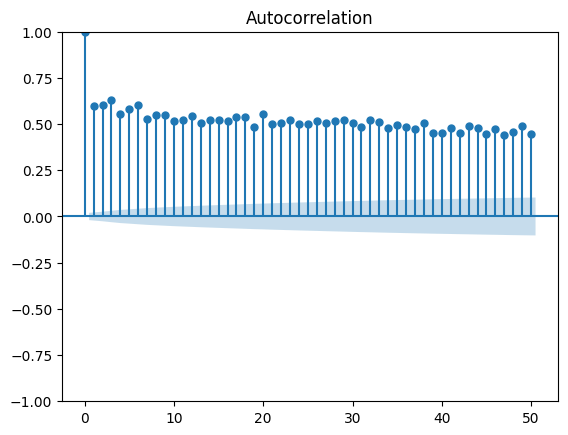

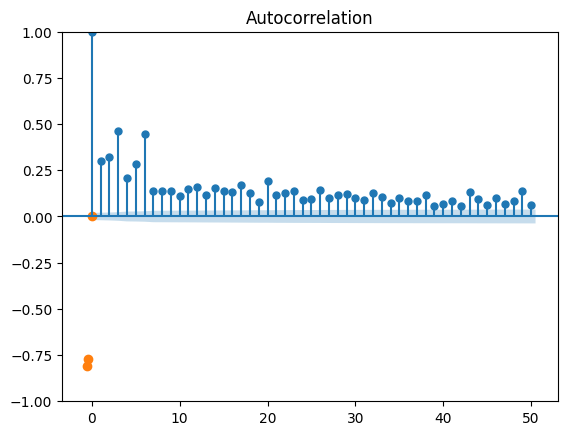

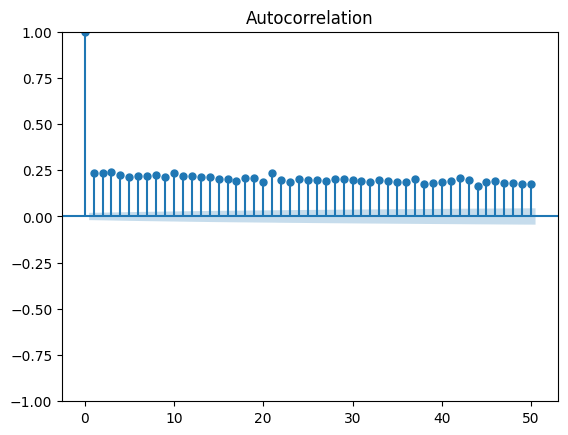

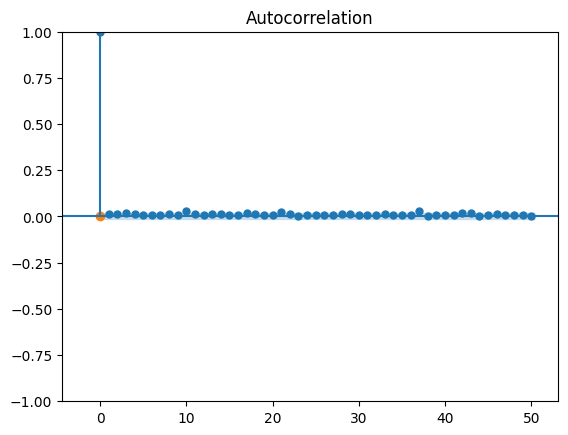

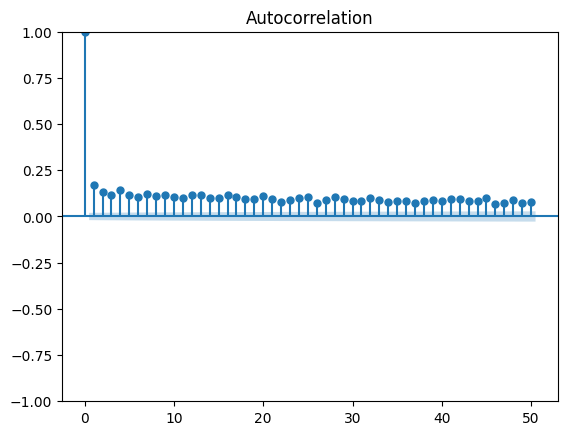

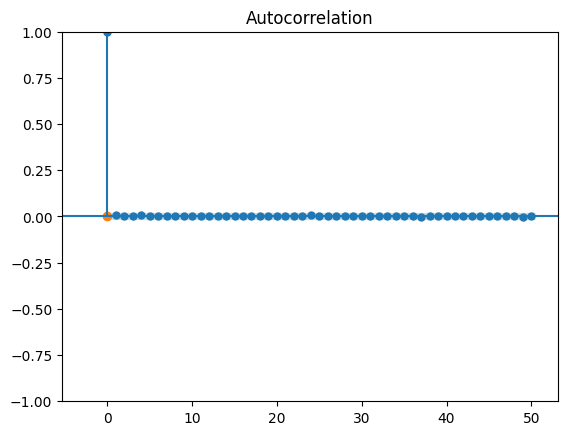

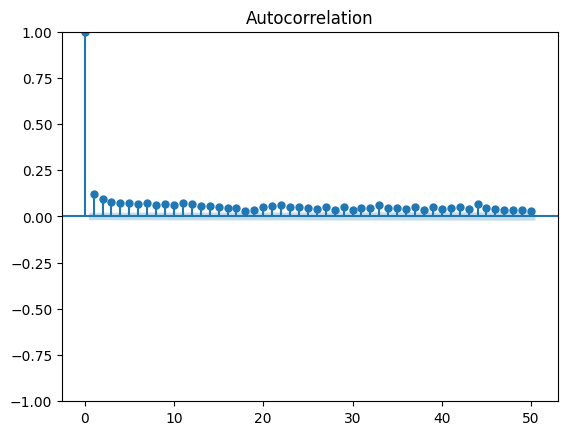

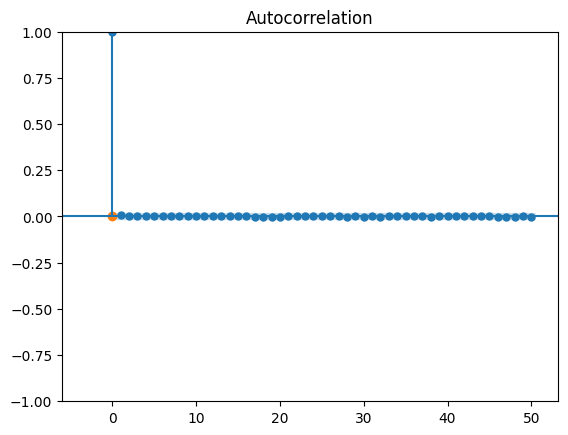

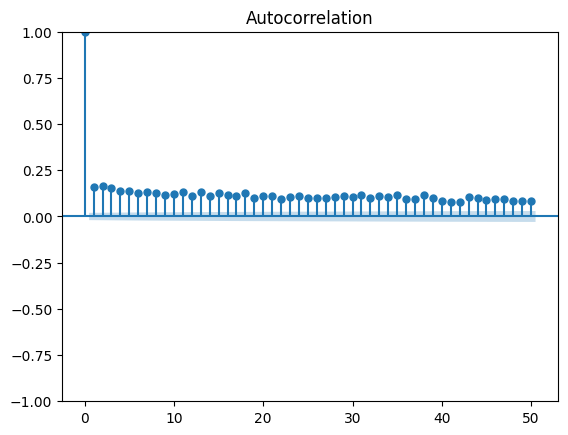

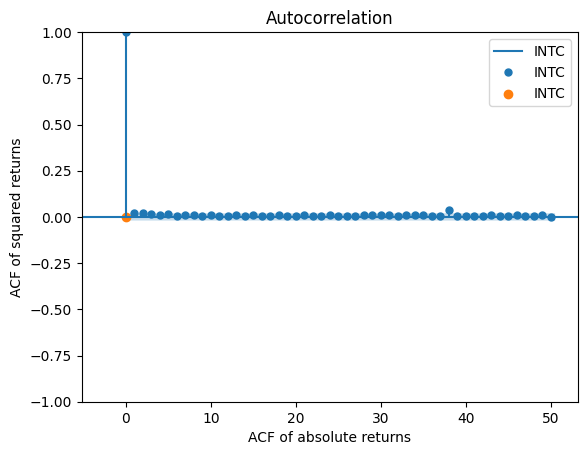

In [10]:
# Plot the ACF v0.1
lags = 50
acf_abs_returns_per_stock = []
acf_squared_returns_per_stock = []
acf_abs_returns_per_stock_log = []
acf_squared_returns_per_stock_log = []
for stock in returns.columns:
    abs_returns = returns[stock].abs()
    squared_returns = np.square(returns[stock])
    plot_acf(abs_returns, lags = lags, label = stock)
    plot_acf(squared_returns, lags = lags, label = stock)
    acf_abs_returns = acf(abs_returns, nlags = lags)
    acf_squared_returns = acf(squared_returns, nlags = lags)
    # plt.scatter(acf_abs_returns, acf_squared_returns, label = stock)
    acf_abs_returns_log = np.log(acf_abs_returns)
    acf_squared_returns_log = np.log(acf_squared_returns)
    # plt.scatter(acf_abs_returns_log, acf_squared_returns_log, label = stock)
    acf_abs_returns_per_stock.append(acf_abs_returns)
    acf_squared_returns_per_stock.append(acf_squared_returns)
    acf_abs_returns_per_stock_log.append(acf_abs_returns_log)
    acf_squared_returns_per_stock_log.append(acf_squared_returns_log)
    # exponent = np.polyfit(acf_abs_returns, acf_squared_returns, 1)[0]
    # print(exponent)
plt.legend()
plt.ylabel('ACF of squared returns')
plt.xlabel('ACF of absolute returns')
plt.show()

In [11]:
acf_abs_returns_per_stock 
acf_squared_returns_per_stock 
acf_abs_returns_per_stock_log 
acf_squared_returns_per_stock_log

[array([ 0.        , -3.14205457, -3.77447147, -4.83797277, -4.5390654 ,
        -4.68807821, -4.72699592, -4.81573133, -4.80899742, -3.60018226,
        -3.53441413, -4.53471213, -5.12704885, -5.05249798, -5.24853205,
        -5.32842938, -5.62756173, -5.18129626, -5.09396627, -4.72416107,
        -4.76258926, -5.12930961, -5.60014412, -4.81306512, -5.74074179,
        -5.02082458, -4.50725337, -5.11158322, -4.63430317, -4.20136864,
        -4.27270016, -4.69027728, -6.17227948, -5.88803212, -4.92578127,
        -5.21341288, -5.0596577 , -5.21503043, -4.09410098, -3.87186759,
        -5.0833456 , -5.69617395, -5.53976027, -6.20820252, -6.65824524,
        -5.66260288, -5.50485115, -4.57173631, -4.48416769, -4.81443704,
        -5.54941064]),
 array([ 0.        , -1.37116051, -1.48161729, -1.83365809, -1.49402073,
        -1.74640555, -1.65628187, -2.00878843, -1.79735776, -1.69189457,
        -1.67109233, -1.95786867, -2.04840795, -2.02573859, -1.9708405 ,
        -1.66249075, -1.6011

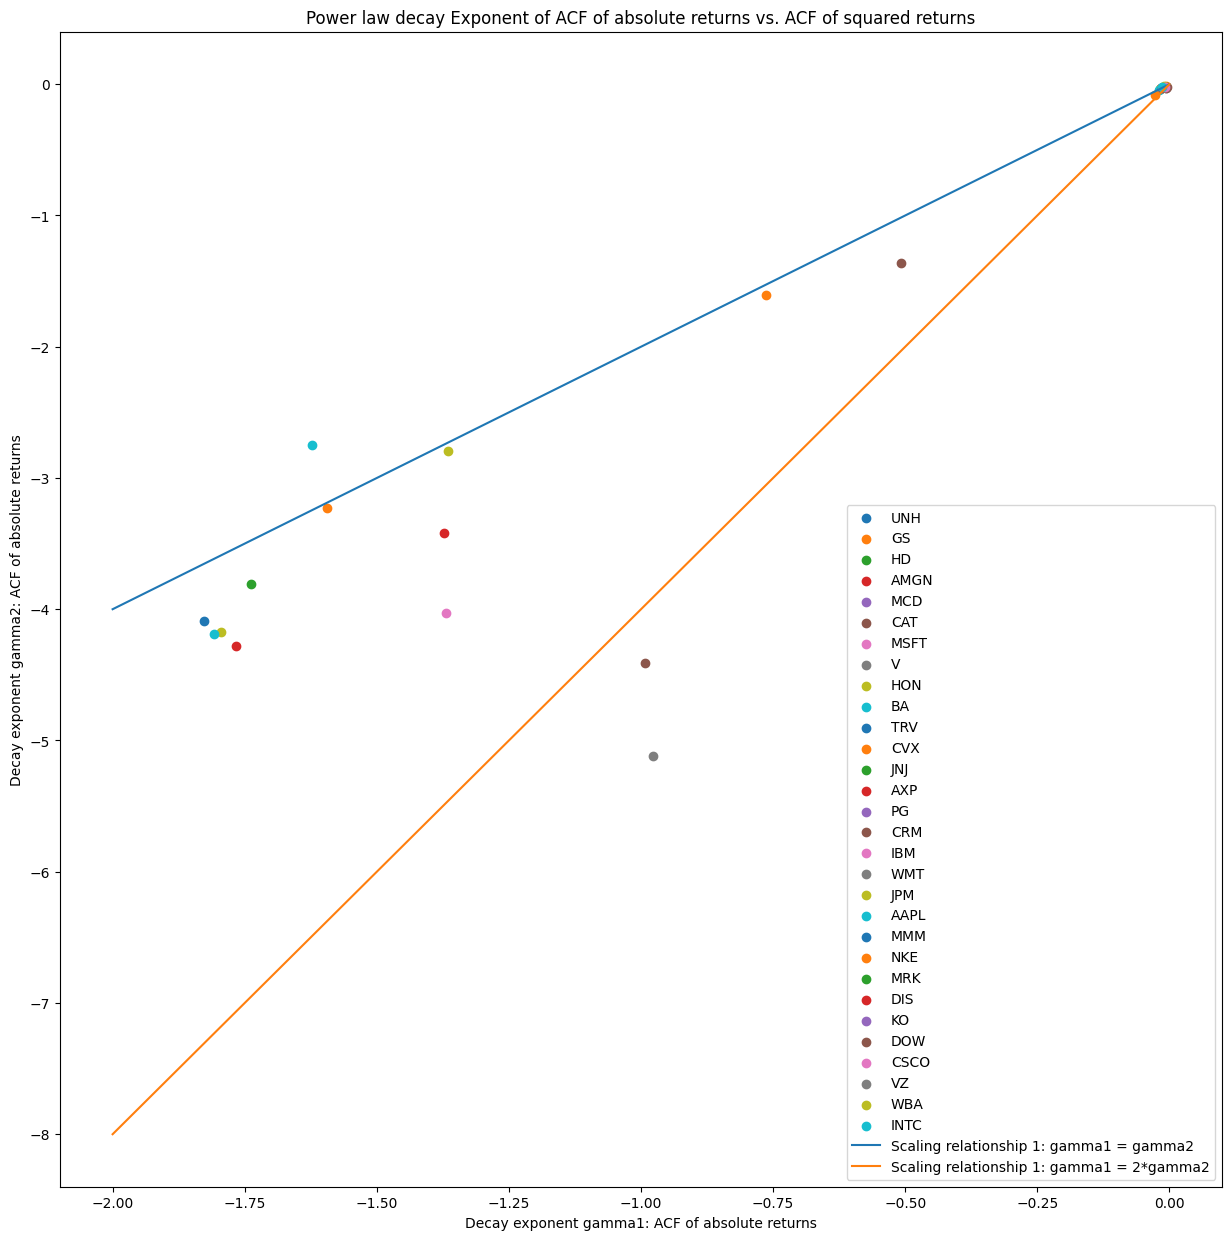

In [36]:
plt.figure(figsize=(15,15))
for index in range(len(acf_abs_returns_per_stock_log)):
    # exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index]), acf_abs_returns_per_stock_log[index],1))
    # exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index]), acf_squared_returns_per_stock_log[index],1))

    exponent_acf_abs_returns = np.polyfit(range(len(acf_abs_returns_per_stock_log[index])), acf_abs_returns_per_stock_log[index],1)
    exponent_acf_squared_returns = np.polyfit(range(len(acf_squared_returns_per_stock_log[index])), acf_squared_returns_per_stock_log[index],1)
    plt.scatter(exponent_acf_abs_returns,exponent_acf_squared_returns, label = returns.columns[index])
    # scaling relationhip 1: gamma1 = gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1
    # scaling relationhip 2: gamma1 = 2*gamma2
    gamma1 = np.linspace(-2, 0, 100)
    gamma2 = gamma1*2
plt.plot(gamma1, gamma2, label = 'Scaling relationship 1: gamma1 = gamma2')
plt.plot(gamma1, 2*gamma2, label = 'Scaling relationship 1: gamma1 = 2*gamma2')
plt.legend()
plt.xlabel('Decay exponent gamma1: ACF of absolute returns')
plt.ylabel('Decay exponent gamma2: ACF of absolute returns')
plt.title('Power law decay Exponent of ACF of absolute returns vs. ACF of squared returns')
plt.show()

# ACF plots of total S&P returns

In [60]:
total_SnP500_index_closing =pd.read_csv('data/df_total_SnP500_closing_10_years_clean.csv', parse_dates = True, index_col = 'Date')

In [61]:
total_SnP500_index_closing

,Close/Last
Date,
2023-01-27,4070.56
2023-01-26,4060.43
2023-01-25,4016.22
2023-01-24,4016.95
2023-01-23,4019.81
...,...
2013-02-05,1511.29
2013-02-04,1495.71
2013-02-01,1513.17


In [62]:
# make a log return series
returns = total_SnP500_index_closing.pct_change().dropna()

In [63]:
# absolute returns
abs_returns = returns.abs()


In [64]:
abs_returns

,Close/Last
Date,
2023-01-26,0.002489
2023-01-25,0.010888
2023-01-24,0.000182
2023-01-23,0.000712
2023-01-20,0.011742
...,...
2013-02-05,0.000549
2013-02-04,0.010309
2013-02-01,0.011673


In [69]:
# squared returns
squared_returns =returns.apply(np.square)


In [72]:
squared_returns

,Close/Last
Date,
2023-01-26,6.193135e-06
2023-01-25,1.185487e-04
2023-01-24,3.303777e-08
2023-01-23,5.069198e-07
2023-01-20,1.378710e-04
...,...
2013-02-05,3.012893e-07
2013-02-04,1.062770e-04
2013-02-01,1.362679e-04


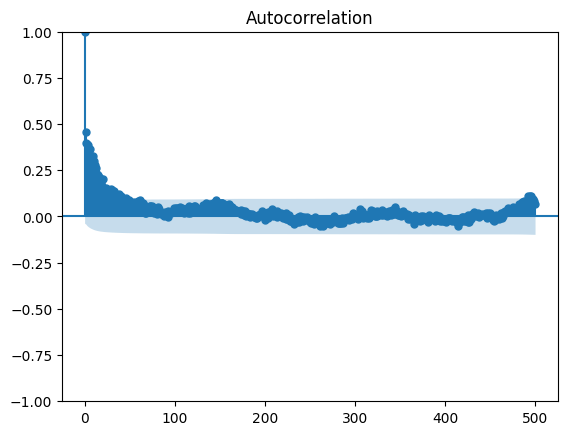

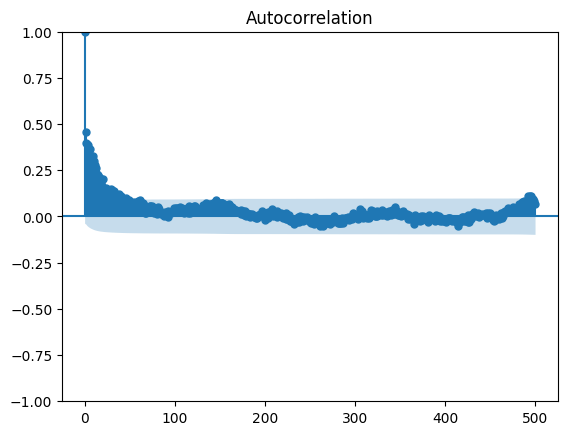

In [75]:
plot_acf(abs_returns, lags = 500)

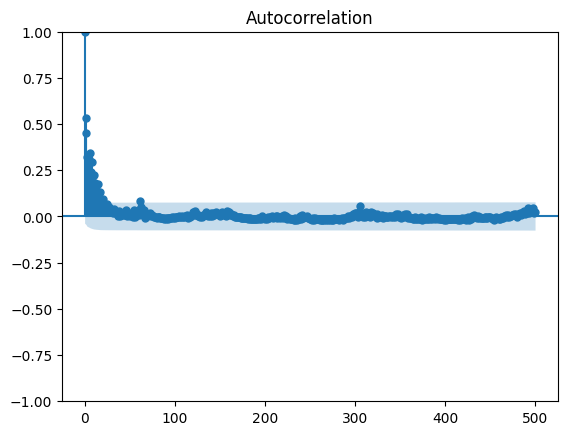

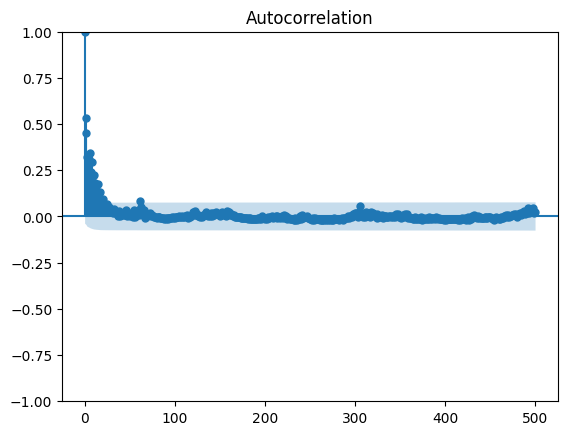

In [74]:
plot_acf(squared_returns, lags = 500)